# Trend-Following Strategy
## Isra Jimenez

This is an exercise in following trends in a specific stock, following Liu's _Quantitative Trading Strategies Using Python_ (2023). Today we're interested in The Hershey Company (Ticker: HSY, NYSE), which just recently (22.07.2025) announced rising prices in cocoa beans will lead them to raise their prices.

## Getting the data

We start by importing libraries we'll be using: *datetime*, *pandas*, *yfinance*, and *matplotlib*.

In [111]:
from datetime import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

We fetch Hershey's stock price data for the current year, with the yf library.

In [112]:
symbol = 'HSY'
df = yf.download(symbol, start="2025-01-01", end=datetime.today().date())
# convert index to datetime format
df.index = pd.to_datetime(df.index)
print(df.head())

C:\Users\rijim\AppData\Local\Temp\ipykernel_8648\3113417455.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start="2025-01-01", end=datetime.today().date())
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker             HSY         HSY         HSY         HSY      HSY
Date                                                               
2025-01-02  165.951355  168.399485  164.810875  168.320828   864500
2025-01-03  166.187317  167.534272  165.125478  166.187317   932600
2025-01-06  163.935837  166.049673  162.991975  165.607244  1387600
2025-01-07  162.736374  166.157845  162.598729  163.896522  1302900
2025-01-08  159.491867  162.618380  157.181382  162.225113  2833500


## Plotting closing price
With the info we got from yf, we plot the closing price with plt.

<Figure size 1500x700 with 0 Axes>

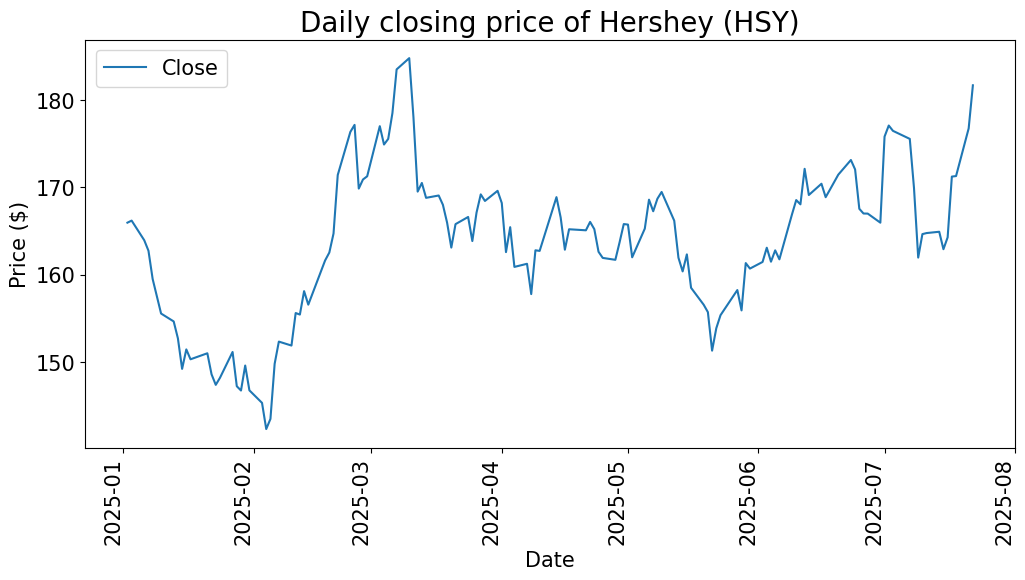

In [113]:
plt.figure(figsize=(15,7))
df['Close'].plot()
# format title, label, ticks, and legend
plt.title('Daily closing price of Hershey (HSY)', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price ($)', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['Close'], prop={'size': 15})

This figure suggests an upward trend overall. We'll explore this further by using **rolling averages**, or moving averages (MA), of the daily closing price, both simple and exponential, to identify potential trade entry and exit points, where one MA crosses another, signalling a potential change in trend. Basically, following Liu, when the shorter-term MA crosses above the longer-term MA, a bullish signal is given, and a bearish one when the shorter MA crosses below the longer one (2023: 156). Also, as Liu mentions, the choice between simple and exponential depends on our preference, EMAs reacting more quickly to recent price changes than SMAs, but for our simpler findings we will start from SMAs.

## Finding simple (SMA) and exponentially weighted (EWMA) moving averages

We will create SMA series with window sizes of three and twenty days and plot them with the closing price.

In [114]:
window = 3
SMA1 = "SMA-"+str(window)
df[SMA1] = df.Close.rolling(window).mean()
colnames = ['Close', SMA1]
# keeping only two columns: closing price and the SMA column
df2 = df[colnames]
print(df2.head())

Price            Close       SMA-3
Ticker             HSY            
Date                              
2025-01-02  165.951355         NaN
2025-01-03  166.187317         NaN
2025-01-06  163.935837  165.358170
2025-01-07  162.736374  164.286509
2025-01-08  159.491867  162.054693


In [115]:
window = 20
SMA2 = "SMA-"+str(window)
df2[SMA2] = df['Close'].rolling(window).mean()
colnames = ['Close',SMA1, SMA2]
df3 = df2[colnames]
print(df3.head())

Price            Close       SMA-3 SMA-20
Ticker             HSY                   
Date                                     
2025-01-02  165.951355         NaN    NaN
2025-01-03  166.187317         NaN    NaN
2025-01-06  163.935837  165.358170    NaN
2025-01-07  162.736374  164.286509    NaN
2025-01-08  159.491867  162.054693    NaN


C:\Users\rijim\AppData\Local\Temp\ipykernel_8648\2338658678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[SMA2] = df['Close'].rolling(window).mean()


We visualize the daily prices with 3-period and 20-period SMAs.

Text(0, 0.5, 'Price ($)')

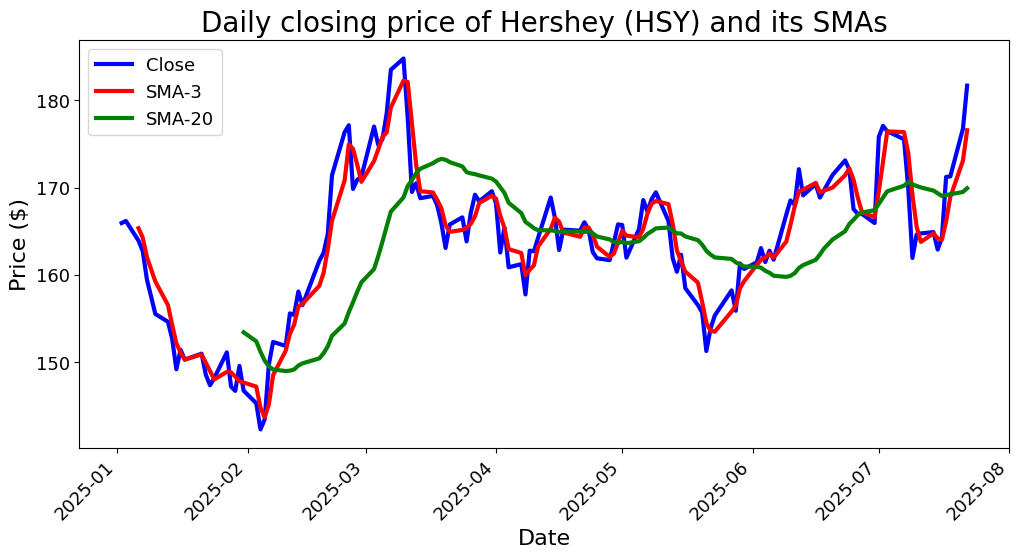

In [116]:
# colors for the line plot
colors = ['blue', 'red', 'green']
# line plot for original price and SMAs
df3.plot(color = colors, linewidth = 3, figsize = (12,6))
# modify ticks and give format to title and labels
plt.xticks(fontsize = 13, rotation = 45)
plt.yticks(fontsize = 13)
plt.legend(labels = colnames, loc = 'best', fontsize = 13)
plt.title('Daily closing price of Hershey (HSY) and its SMAs', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16)

Now we move to EWMAs, with alphas of 0.1 and 0.5. Since a higher alpha emphasises recent prices with more weight, our first alpha gives more weight to historical prices and the second assigns equal weight to the current observation and historical observations.

In [117]:
alpha = 0.1
df3['EWM_'+str(alpha)] = df['Close'].ewm(alpha=alpha, adjust=False).mean()
alpha = 0.5
df3['EWM_'+str(alpha)] = df['Close'].ewm(alpha=alpha, adjust=False).mean()
print(df3.head())

Price            Close       SMA-3 SMA-20     EWM_0.1     EWM_0.5
Ticker             HSY                                           
Date                                                             
2025-01-02  165.951355         NaN    NaN  165.951355  165.951355
2025-01-03  166.187317         NaN    NaN  165.974951  166.069336
2025-01-06  163.935837  165.358170    NaN  165.771040  165.002586
2025-01-07  162.736374  164.286509    NaN  165.467573  163.869480
2025-01-08  159.491867  162.054693    NaN  164.870003  161.680674


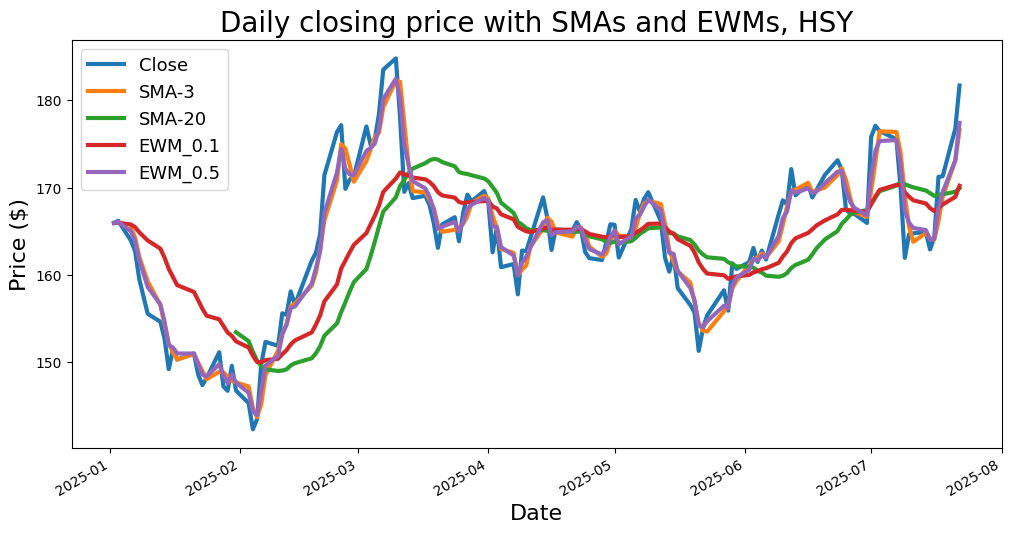

In [118]:
#plotting all moving averages together
df3.plot(linewidth=3, figsize = (12,6))
plt.title('Daily closing price with SMAs and EWMs, HSY', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16)
colnames = ['Close',SMA1, SMA2, 'EWM_0.1', 'EWM_0.5']
plt.legend(labels=colnames, fontsize = 13)

Notice that EWM_0.1 (red) and SMA-20 (green) are close, since both give more weight to historical observations. The same is true for our other two MAs, with less smoothing. Now we will use our MAs as technical indicators to see a trend-following strategy.

## Implementing a trend-following strategy

In a nutshell, when short term MA crosses above long-term MA, it signals a buy action and the strategy is to long the asset and when short term crosses below long term it signals to sell and short the asset. Of course, this assumes no transaction cost, and a liquid and complete market.

In [119]:
df4 = df3
# shift to the future by one day so that everyday uses info upto yesterday to make
# trading decisions for tmrw
df4['SMA-3'] = df3['SMA-3'].shift(1)
df4['SMA-20'] = df3['SMA-20'].shift(1)
# identify buy signal
df4['signal'] = np.where(df4['SMA-3'] > df4['SMA-20'], 1, 0)
# identify sell signal
df4['signal'] = np.where(df4['SMA-3'] < df4['SMA-20'], -1, df4['signal'])
df4.dropna(inplace=True)
# check freq distr of the signal col
print(df4['signal'].value_counts())

signal
 1    63
-1    54
Name: count, dtype: int64


The result shows more inclining days, confirming our upward trending price series seen above.

Now we introduce baseline strategy, *buy-and-hold*, which assumes we hold one share of Hershey's stock until end of period. To facilitate calculations, we use log return.

In [120]:
df4['log_return_buy_n_hold'] = np.log(df3.Close).diff()

To obtain the single-period log return for out trend-following strategy we multiply signal by log_return_buy_n_hold, the signal telling us whether to go long (1) or short (-1).

In [121]:
df4['log_return_trend_follow'] = df4.signal * df4.log_return_buy_n_hold

Now, we create explicit trading actions, where if signal remains the same for two consecutive periods we hold on to the position but the sign switch in the trading signal gives us the action whether to long or short.

In [122]:
df4['action'] = df4.signal.diff()
print(df4['action'].value_counts())

action
 0.0    103
 2.0      7
-2.0      6
Name: count, dtype: int64


The result shows us 13 days with trading action, 7 to change from short to long and 6 to change from long to short.

We will now add code to visualize these actions as triangles on the graph with stock prices, buy with green and sell with red.

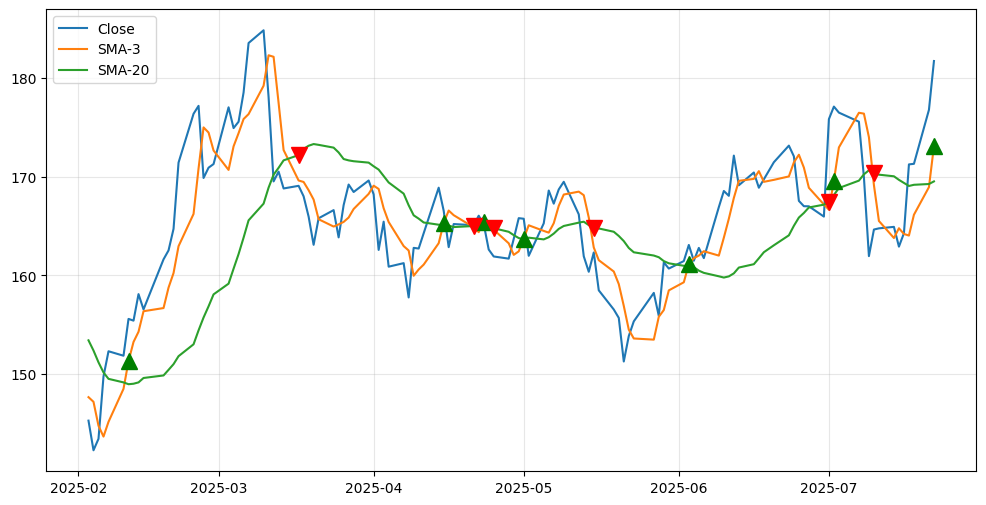

In [123]:
plt.rcParams['figure.figsize'] = (12,6)
plt.grid(True, alpha = 0.3)
plt.plot(df4.Close, label = 'Close')
plt.plot(df4['SMA-3'], label = 'SMA-3')
plt.plot(df4['SMA-20'], label = 'SMA-20')
plt.plot(df4.loc[df4.action == 2].index, df4['SMA-3'][df4.action == 2], '^', color = 'g', markersize = 12)
plt.plot(df4[df4.action == -2].index, df4['SMA-20'][df4.action == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc = 'best')

We confirm the most recent action, which seems to recommend we long the asset, as the short term single MA has gone further upward above long term single MA.

In [125]:
print(df4.action.tail())

Date
2025-07-16    0.0
2025-07-17    0.0
2025-07-18    0.0
2025-07-21    0.0
2025-07-22    2.0
Name: action, dtype: float64
